1. 搭建的神经网络，使用olivettiface数据集进行训练。

In [2]:
# 导入数据集
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import fetch_olivetti_faces # 导入Olivetti人脸数据集
from sklearn.model_selection import train_test_split # 导入训练测试数据集划分函数
from torch.utils.data import DataLoader # 导入数据加载器

In [3]:
# 加载数据集
faces_data = fetch_olivetti_faces(data_home='./face_data',shuffle=True) # 下载Olivetti人脸数据集
print(faces_data.DESCR) # 打印数据集描述
print(faces_data.data.shape) # 打印数据集大小
print(faces_data.target.shape) # 打印数据集标签大小
print(faces_data.images.shape) # 打印数据集图像大小

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

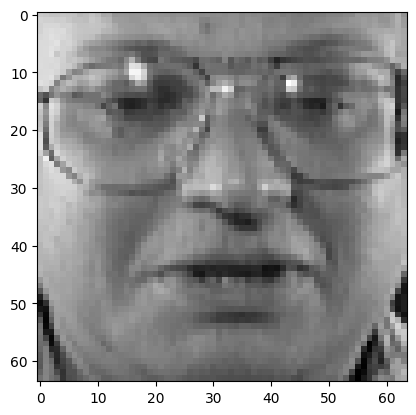

In [4]:
# 查看图片
import matplotlib.pyplot as plt

face = faces_data.images[1] # 获取第一张人脸图像
plt.imshow(face, cmap='gray') # 显示图像
plt.show()


In [5]:
faces_data.data[1] # 获取第一张人脸图像的像素值

array([0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
       0.6528926 ], dtype=float32)

In [6]:
faces_data.target  

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25,  6,
       31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2, 36, 21, 25,  4, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6,
       16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2,
       18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27,
       27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38,
       34,  4,  1, 28,  7

In [7]:
images = torch.tensor(faces_data.data)  # 将数据转换为张量
targets = torch.tensor(faces_data.target,dtype=torch.long)  # 将标签转换为张量

print(images.shape)  # 打印图像数据大小
print(targets.shape)  # 打印标签数据大小

dataset = [(img, lbl) for img, lbl in zip(images, targets)]  # 将数据集转换为列表形式
dataset[0]

torch.Size([400, 4096])
torch.Size([400])


(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]), tensor(13))

In [8]:
#train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42) # 划分训练集和测试集  
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True) # 创建数据加载器

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 检测是否有GPU可用

In [10]:
# 多层神经网络模型
model = nn.Sequential(
    nn.Linear(4096, 8192),  # 输入层到隐藏层
    nn.ReLU(),  # 激活函数
    nn.Linear(8192, 16384),  # 隐藏层到隐藏层
    nn.ReLU(),  # 激活函数
    nn.Dropout(),  # Dropout层
    nn.Linear(16384, 1024),  # 隐藏层到隐藏层
    nn.ReLU(),  # 激活函数
    nn.Linear(1024, 40)  # 隐藏层到输出层
).to(device)  # 创建多层神经网络模型并将其移动到GPU上

In [11]:
print(model)  # 打印模型结构

Sequential(
  (0): Linear(in_features=4096, out_features=8192, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8192, out_features=16384, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=16384, out_features=1024, bias=True)
  (6): ReLU()
  (7): Linear(in_features=1024, out_features=40, bias=True)
)


In [12]:
criterion = nn.CrossEntropyLoss()  # 定义损失函数
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # 定义优化器

In [13]:
loss_hist = []  # 初始化损失历史列表

# 训练模型
for i in range(10):
    for img, lbl in dataloader:
        img, lbl = img.to(device), lbl.to(device)  # 将数据移动到GPU上
        result = model(img)  # 前向传播
        loss = criterion(result, lbl)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新参数
        optimizer.zero_grad()  # 清空梯度

        loss_hist.append(loss.item())  # 记录损失
        print(f"Epoch {i+1}, Loss: {loss.item():.4f}")  # 打印损失

Epoch 1, Loss: 3.7093
Epoch 1, Loss: 61.9431
Epoch 1, Loss: 7.6401
Epoch 1, Loss: 3.8611
Epoch 1, Loss: 3.9394
Epoch 1, Loss: 3.9839
Epoch 1, Loss: 4.1762
Epoch 1, Loss: 3.7024
Epoch 1, Loss: 3.6432
Epoch 1, Loss: 3.8724
Epoch 1, Loss: 3.7545
Epoch 1, Loss: 3.9214
Epoch 1, Loss: 3.7344
Epoch 1, Loss: 3.6806
Epoch 1, Loss: 3.7137
Epoch 1, Loss: 3.8048
Epoch 1, Loss: 3.7072
Epoch 1, Loss: 3.8274
Epoch 1, Loss: 3.8171
Epoch 1, Loss: 3.6742
Epoch 1, Loss: 3.7005
Epoch 1, Loss: 3.7388
Epoch 1, Loss: 3.6340
Epoch 1, Loss: 3.7208
Epoch 1, Loss: 3.6768
Epoch 1, Loss: 3.7126
Epoch 1, Loss: 3.8032
Epoch 1, Loss: 3.7205
Epoch 1, Loss: 3.7423
Epoch 1, Loss: 3.6953
Epoch 1, Loss: 3.6986
Epoch 1, Loss: 3.7096
Epoch 1, Loss: 3.6916
Epoch 1, Loss: 3.7127
Epoch 1, Loss: 3.6993
Epoch 1, Loss: 3.6914
Epoch 1, Loss: 3.6931
Epoch 1, Loss: 3.6788
Epoch 1, Loss: 3.7132
Epoch 1, Loss: 3.6997
Epoch 2, Loss: 3.6978
Epoch 2, Loss: 3.7045
Epoch 2, Loss: 3.6752
Epoch 2, Loss: 3.6692
Epoch 2, Loss: 3.6934
Epoch 2, 

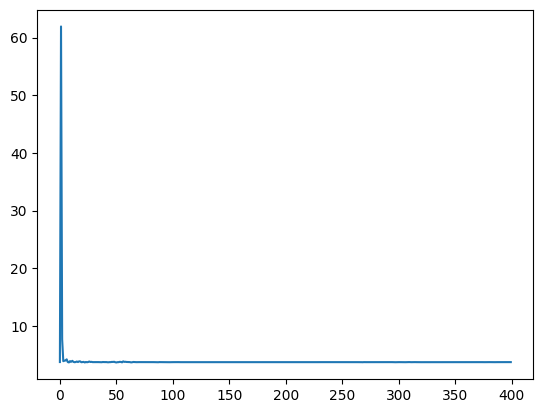

In [14]:
plt.plot(range(len(loss_hist)), loss_hist)  # 绘制损失曲线
plt.show()  # 显示损失曲线